In [2]:
import sys

sys.path.append("../libs")

import neuronas
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

importlib.reload(neuronas)

from neuronas import NeuronaPerceptron

In [3]:
df_casas = pd.read_csv("../data/houses1_dataset.csv")

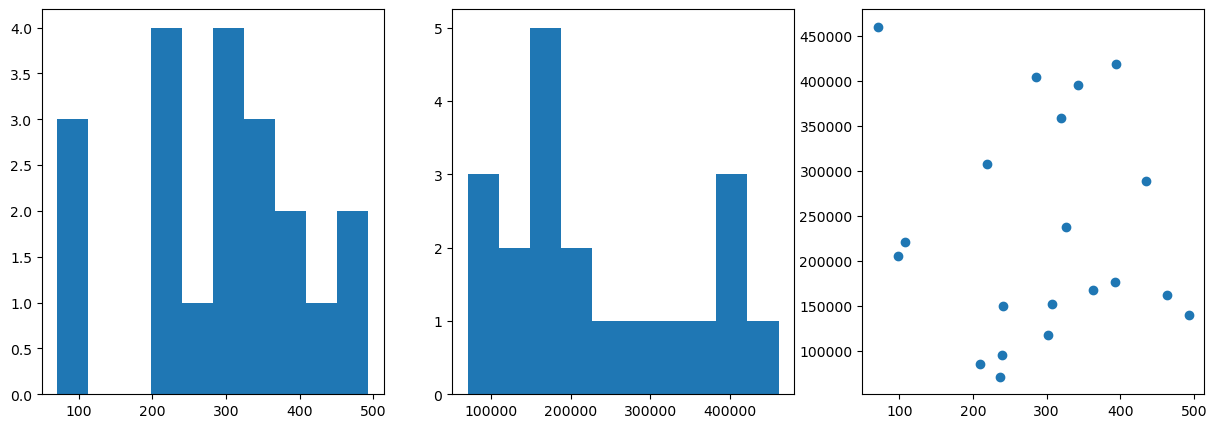

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax1.hist(df_casas.Area)
ax2.hist(df_casas.Precio)

#colores = df_casas['Decision'].map({'Comprar': 'blue', 'No_Comprar': 'red'})
ax3.scatter(df_casas.Area, df_casas.Precio) #, c=colores

fig.get_tight_layout()
plt.show()

In [5]:
df_casas['Precio_'] = (df_casas.Precio - min(df_casas.Precio)) / (max(df_casas.Precio) - min(df_casas.Precio))

df_casas['Area_'] = (df_casas.Area - min(df_casas.Area)) / (max(df_casas.Area) - min(df_casas.Area))

df_casas['Decision_'] = df_casas.Decision.map({'Comprar': 1, 'No_Comprar': 0})

In [6]:
df_casas.iloc[:3, [3, 4]]

,Precio_,Area_
0,0.207716,0.559242
1,0.271697,0.763033
2,0.233335,0.928910


In [7]:
df_casas.loc[:2, ["Precio_", "Area_"]]

,Precio_,Area_
0,0.207716,0.559242
1,0.271697,0.763033
2,0.233335,0.928910


In [8]:
df_casas.loc[:2, ["Precio_", "Area_"]].to_numpy()

array([[0.20771602, 0.55924171],
       [0.2716968 , 0.76303318],
       [0.23333505, 0.92890995]])

In [9]:
df_casas.loc[:2, ["Precio_", "Area_"]].to_numpy().flatten()

array([0.20771602, 0.55924171, 0.2716968 , 0.76303318, 0.23333505,
       0.92890995])

In [10]:
df_casas.loc[0:0, ['Precio_', 'Area_']].to_numpy().flatten()

array([0.20771602, 0.55924171])

In [11]:
perceptron = NeuronaPerceptron(entradas=2, salidas=1)
salidas = perceptron.predecir_feedforward(
    df_casas.loc[0:0, ['Precio_', 'Area_']].to_numpy().flatten()
)

salidas

1

In [12]:
df_casas["y_p1"] = np.nan

for indice, muestra_fila in df_casas.iterrows():
    muestra_datos = muestra_fila[["Precio_", "Area_"]].to_numpy().flatten()
    salida = perceptron.predecir_feedforward(muestra_datos)
    df_casas.at[indice, "y_p1"] = np.int8(salida)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1
0,151958,307,Comprar,0.207716,0.559242,1,1.0
1,176867,393,Comprar,0.271697,0.763033,1,1.0
2,161932,463,Comprar,0.233335,0.928910,1,1.0
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0
5,149879,241,Comprar,0.202376,0.402844,1,1.0
6,140268,493,Comprar,0.177689,1.000000,1,1.0
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0
8,84886,210,Comprar,0.035436,0.329384,1,1.0
9,167337,363,Comprar,0.247218,0.691943,1,1.0


In [13]:
df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1
0,151958,307,Comprar,0.207716,0.559242,1,1.0
1,176867,393,Comprar,0.271697,0.763033,1,1.0
2,161932,463,Comprar,0.233335,0.928910,1,1.0
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0
5,149879,241,Comprar,0.202376,0.402844,1,1.0
6,140268,493,Comprar,0.177689,1.000000,1,1.0
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0
8,84886,210,Comprar,0.035436,0.329384,1,1.0
9,167337,363,Comprar,0.247218,0.691943,1,1.0


In [14]:
datos_entrada = df_casas.loc[:, ['Precio_', 'Area_']].to_numpy()
datos_salida_real = df_casas.loc[:, ['Decision_']].to_numpy()

# Sin entrenar
perceptron_sin = NeuronaPerceptron(entradas=2, salidas=1)
salidas_sin = perceptron_sin.predecir_feedforward(datos_entrada)

# Entrenar
perceptron_20 = NeuronaPerceptron(entradas=2, salidas=1)
perceptron_20.entrenar_ajustar(datos_entrada, datos_salida_real, 0.025, 20)

salidas_entrenadas = perceptron_20.predecir_feedforward(datos_entrada)

print(salidas_sin)
print(salidas_entrenadas)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]


In [15]:
# df_casas["y_p2"] = np.nan

# for indice, muestra_fila in df_casas.iterrows():
#     muestra_datos = muestra_fila[["Precio_", "Area_"]].to_numpy().flatten()
#     salida = perceptron_20.predecir_feedforward(muestra_datos)
#     df_casas.at[indice, "y_p2"] = np.int8(salida)

df_casas["y_p2"] = perceptron_20.predecir_feedforward(datos_entrada)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1,y_p2
0,151958,307,Comprar,0.207716,0.559242,1,1.0,1
1,176867,393,Comprar,0.271697,0.763033,1,1.0,1
2,161932,463,Comprar,0.233335,0.928910,1,1.0,1
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0,0
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0,0
5,149879,241,Comprar,0.202376,0.402844,1,1.0,1
6,140268,493,Comprar,0.177689,1.000000,1,1.0,1
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0,0
8,84886,210,Comprar,0.035436,0.329384,1,1.0,1
9,167337,363,Comprar,0.247218,0.691943,1,1.0,1


In [16]:
perceptron_1 = NeuronaPerceptron(entradas=2, salidas=1)
perceptron_1.entrenar_ajustar(datos_entrada, datos_salida_real, 0.025, 1)
df_casas["y_p3"] = perceptron_1.predecir_feedforward(datos_entrada)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1,y_p2,y_p3
0,151958,307,Comprar,0.207716,0.559242,1,1.0,1,1
1,176867,393,Comprar,0.271697,0.763033,1,1.0,1,1
2,161932,463,Comprar,0.233335,0.928910,1,1.0,1,1
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0,0,1
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0,0,1
5,149879,241,Comprar,0.202376,0.402844,1,1.0,1,1
6,140268,493,Comprar,0.177689,1.000000,1,1.0,1,1
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0,0,1
8,84886,210,Comprar,0.035436,0.329384,1,1.0,1,1
9,167337,363,Comprar,0.247218,0.691943,1,1.0,1,1


In [17]:
perceptron_2 = NeuronaPerceptron(entradas=2, salidas=1)
perceptron_2.entrenar_ajustar(datos_entrada, datos_salida_real, 0.025, 2)
df_casas["y_p4"] = perceptron_2.predecir_feedforward(datos_entrada)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1,y_p2,y_p3,y_p4
0,151958,307,Comprar,0.207716,0.559242,1,1.0,1,1,1
1,176867,393,Comprar,0.271697,0.763033,1,1.0,1,1,1
2,161932,463,Comprar,0.233335,0.928910,1,1.0,1,1,1
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0,0,1,1
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0,0,1,1
5,149879,241,Comprar,0.202376,0.402844,1,1.0,1,1,1
6,140268,493,Comprar,0.177689,1.000000,1,1.0,1,1,1
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0,0,1,1
8,84886,210,Comprar,0.035436,0.329384,1,1.0,1,1,1
9,167337,363,Comprar,0.247218,0.691943,1,1.0,1,1,1


In [18]:
perceptron_5 = NeuronaPerceptron(entradas=2, salidas=1)
perceptron_5.entrenar_ajustar(datos_entrada, datos_salida_real, 0.025, 5)
df_casas["y_p5"] = perceptron_5.predecir_feedforward(datos_entrada)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1,y_p2,y_p3,y_p4,y_p5
0,151958,307,Comprar,0.207716,0.559242,1,1.0,1,1,1,0
1,176867,393,Comprar,0.271697,0.763033,1,1.0,1,1,1,0
2,161932,463,Comprar,0.233335,0.928910,1,1.0,1,1,1,0
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0,0,1,1,1
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0,0,1,1,1
5,149879,241,Comprar,0.202376,0.402844,1,1.0,1,1,1,0
6,140268,493,Comprar,0.177689,1.000000,1,1.0,1,1,1,0
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0,0,1,1,0
8,84886,210,Comprar,0.035436,0.329384,1,1.0,1,1,1,0
9,167337,363,Comprar,0.247218,0.691943,1,1.0,1,1,1,0


In [19]:
perceptron_6 = NeuronaPerceptron(entradas=2, salidas=1)
perceptron_6.entrenar_ajustar(datos_entrada, datos_salida_real, 0.025, 10)
df_casas["y_p6"] = perceptron_6.predecir_feedforward(datos_entrada)

df_casas

,Precio,Area,Decision,Precio_,Area_,Decision_,y_p1,y_p2,y_p3,y_p4,y_p5,y_p6
0,151958,307,Comprar,0.207716,0.559242,1,1.0,1,1,1,0,1
1,176867,393,Comprar,0.271697,0.763033,1,1.0,1,1,1,0,1
2,161932,463,Comprar,0.233335,0.928910,1,1.0,1,1,1,0,1
3,395838,343,No_Comprar,0.834142,0.644550,0,1.0,0,1,1,1,0
4,289178,435,No_Comprar,0.560177,0.862559,0,1.0,0,1,1,1,0
5,149879,241,Comprar,0.202376,0.402844,1,1.0,1,1,1,0,1
6,140268,493,Comprar,0.177689,1.000000,1,1.0,1,1,1,0,1
7,237892,326,No_Comprar,0.428444,0.604265,0,1.0,0,1,1,0,0
8,84886,210,Comprar,0.035436,0.329384,1,1.0,1,1,1,0,1
9,167337,363,Comprar,0.247218,0.691943,1,1.0,1,1,1,0,1


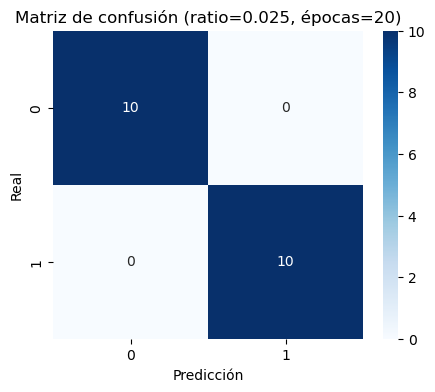

In [20]:
cm = confusion_matrix(df_casas['Decision_'], df_casas["y_p2"])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (ratio=0.025, épocas=20)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

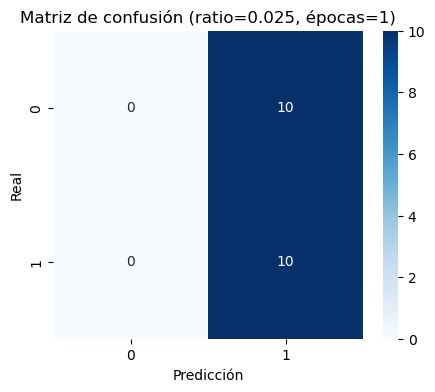

In [21]:
cm = confusion_matrix(df_casas["Decision_"], df_casas["y_p3"])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (ratio=0.025, épocas=1)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

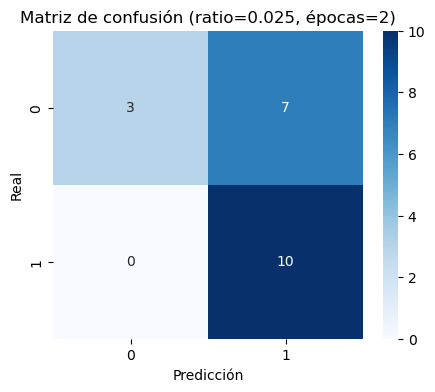

In [22]:
cm = confusion_matrix(df_casas["Decision_"], df_casas["y_p4"])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (ratio=0.025, épocas=2)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

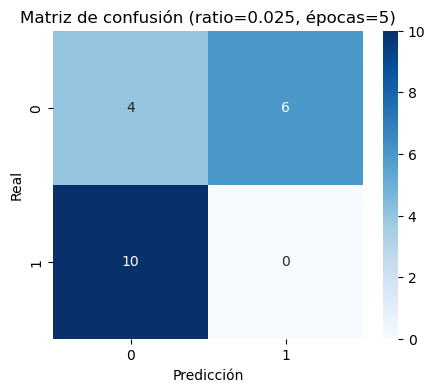

In [23]:
cm = confusion_matrix(df_casas["Decision_"], df_casas["y_p5"])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (ratio=0.025, épocas=5)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

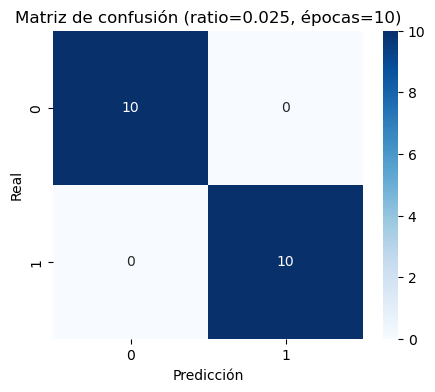

In [24]:
cm = confusion_matrix(df_casas["Decision_"], df_casas["y_p6"])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión (ratio=0.025, épocas=10)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()